# Analyzing Advertisment Markets

In this project, we will be performing practical data analysis in order to determine what two markets are best for advertising our product. Our product consists of an e-learning company that focuses on programming courses such as **web and mobile development, data science, and game development**.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

survey_data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

print('Number of Rows: ', survey_data.shape[0],
      '\nNumber of Columns: ', survey_data.shape[1]
     )

#To avoid truncated output
pd.options.display.max_columns = 150 
survey_data.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



Number of Rows:  18175 
Number of Columns:  136


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

Because developing and organizing our own survey can be costly, what we will do instead is analyze a survey from [freecodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969), freeCodeCamp was able to attract new coders with diverse interests through their use of running a [popular Medium publication.](https://medium.freecodecamp.org/) 

The data for this survey is available at this [link](https://github.com/freeCodeCamp/2017-new-coder-survey).

## Checking for Sample Representativity


In [2]:
#Creating Job Role Interest table
job_interests = pd.DataFrame(survey_data['JobRoleInterest'].value_counts(normalize=True) * 100)
job_interests.reset_index(inplace=True)
job_interests.rename(columns={'index':'job_role', 'JobRoleInterest':'percentage'})

,job_role,percentage
0,Full-Stack Web Developer,11.770595
1,Front-End Web Developer,6.435927
2,Data Scientist,2.173913
3,Back-End Web Developer,2.030892
4,Mobile Developer,1.673341
5,Game Developer,1.630435
6,Information Security,1.315789
7,"Full-Stack Web Developer, Front-End Web Deve...",0.915332
8,"Front-End Web Developer, Full-Stack Web Deve...",0.800915
9,Product Manager,0.786613


After a brief look, our sample seems to be quite representative of our data, regardless of the large percentage that is interested in "Full-Stack Web Developer". There are a couple things that we can observe from analyzing from the table:

    1) A lot of people are interested in various topics
    2) A majority of users are interested in general Web Development
    3) Only a small percent of users are interested in Mobile Development
    
We are going to generate a histogram to get a better understanding of how many users are interested in Web and Mobile development. We'll start off by removing any rows with null values, creating a frequency table, and finally displaying the histogram.

In [3]:
#Checking how many rows have Null values
survey_data['JobRoleInterest'].isnull().value_counts()

True     11183
False     6992
Name: JobRoleInterest, dtype: int64

We can see here that more than half of the rows in our **JobRoleInterest** column are null values. We'll go ahead and continue with removing these values.

In [4]:
#Dropping Null Values
survey_no_nulls = survey_data['JobRoleInterest'].dropna()

#Creating Frequency Table
web_or_mobile = survey_no_nulls.str.contains(
    'Web Developer|Mobile Developer'
    )
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


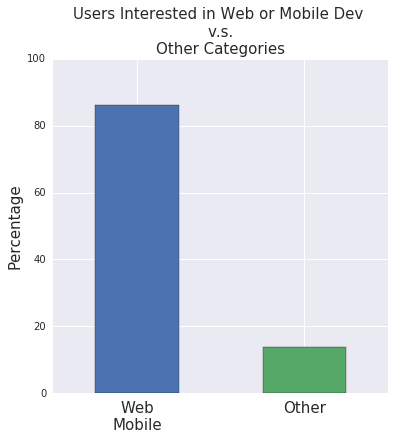

In [5]:
#Creating histogram
freq_table.plot.bar(figsize=(6,6))
plt.title('Users Interested in Web or Mobile Dev \nv.s.\nOther Categories', size=15)
plt.ylim((0,100))
plt.ylabel('Percentage', size=15)
plt.xticks([0,1], ['Web\nMobile', 'Other'], rotation=0, size=15)
plt.show()

We can clearly see that our sample is indeed representative of the population of interest. Our focus is on users interested specifically in Web or Mobile Development and it looks like, based on this bar plot, about 86% of users are interested in web or mobile development.

## New Coders - Locations and Densities

The data we have in front of us contains two columns related to location: **CountryCitizen** which refers to the country in which the user was born, and **CountryLive** which describes the country the user currently resides in. We are going to focus on using the **CountryLive** so that we can target our users in real time when we run these ads. We can also view each individual country as a separate market and thus frame our goal as choosing the top 2 countries in our data.

In [6]:
# Dropping null values
survey_data = survey_data[survey_data['JobRoleInterest'].notnull()].copy()

# Absolute Frequency
abs_freq = survey_data['CountryLive'].value_counts()[0:10]
print(abs_freq, '\n')

# Relative Frequency
rel_freq = (survey_data['CountryLive'].value_counts(normalize=True) * 100)[0:10]
print(rel_freq)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64 

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: CountryLive, dtype: float64


We can observe that the U.S. and India would be our two best markets for our elearning ads. However, we need to make sure that the users in these specific markets would be willing to purchase our product. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us. We can go ahead and narrow our analysis even further to the top 4 countries for two reasons:

    1) These countries had the highest frequencies in our sample
    2) Our courses are written in English, which is an official language in these countries. The more people that know English, the better our chances to target the right people with our ads.
    
## Spending Money for Learning

In [7]:
# Replacing 0's with 1's
survey_data['MonthsProgramming'].replace(0, 1, inplace=True)

# Creating new column 
survey_data['money_per_month'] = round(survey_data['MoneyForLearning'] / survey_data['MonthsProgramming'], 2)

# Removing Null rows from money_per_month
print('Number of null values before: ', survey_data['money_per_month'].isnull().sum())
survey_data = survey_data[survey_data['money_per_month'].notnull()]
print('Number of null values after: ', survey_data['money_per_month'].isnull().sum())

Number of null values before:  675
Number of null values after:  0


In [8]:
# Removing Null rows from CountryLive
print('Number of null values before: ', survey_data['CountryLive'].isnull().sum())
survey_data = survey_data[survey_data['CountryLive'].notnull()]
print('Number of null values after: ', survey_data['CountryLive'].isnull().sum())

Number of null values before:  105
Number of null values after:  0


In [22]:
# Displaying average spending for top 4 countries
grouped = survey_data.groupby('CountryLive').mean()
grouped['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']].sort_values(ascending=False)

CountryLive
United States of America    227.998023
India                       135.101102
Canada                      113.510958
United Kingdom               45.534337
Name: money_per_month, dtype: float64

There is a very clear discrepancy between India and the last two countries. There is a possibility that our data was not very representative of the data for both the UK and Canada. There is also the chance that we have a couple of outliers affecting the overall mean. We are going to analyze the data even further to see if there are any extreme outliers within our data.

## Dealing with Extreme Outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



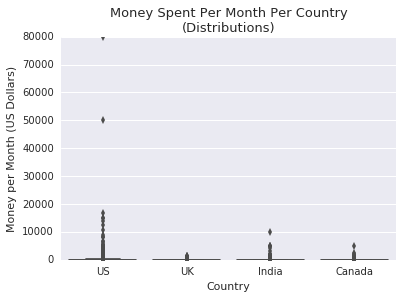

In [10]:
# Selecting top four countries
top_four = survey_data[survey_data['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Creating box plots
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = top_four)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 13)
plt.ylabel('Money per Month (US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It's hard to tell much information from here, but one thing we can notice is that the US has two very unlikely outliers. There are two people who have spent $50,000 or more per month, which seems very unlikely. We can try removing these outliers and re-examine the data.

In [11]:
# Removing US outliers
top_four = top_four[top_four['money_per_month'] < 20000]

# Re-examining data
grouped = top_four.groupby('CountryLive').mean()
grouped['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    183.800136
India                       135.101102
United Kingdom               45.534337
Canada                      113.510958
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



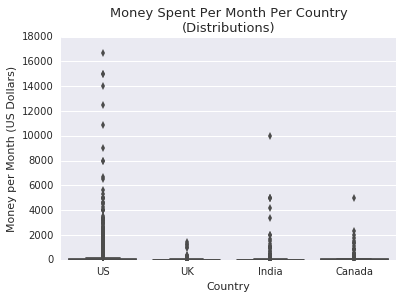

In [12]:
# Re-examining box plots
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = top_four)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 13)
plt.ylabel('Money per Month (US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

### India Outliers

In [13]:
# Analyzing India outliers
india = top_four[(top_four['money_per_month'] >= 2500) & (top_four['CountryLive'] == 'India')]
india

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.00
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,Na

There data shows that none of the outliers attended bootcamp and furthermore, some of these users answered that they were looking for work. We don't know whether theses users have another source of income that justifies the spending habits or if the data was a mistake. We will go ahead and get rid of these outliers to be on the safe side.

In [14]:
# Removing India outliers
top_four = top_four.drop(india.index)

### Canada Outliers

In [15]:
# Analyzing Canada outliers
canada = top_four[(top_four['money_per_month'] >= 4000) & (top_four['CountryLive'] == 'Canada')]
canada

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This user did attend boot camp and also gave info stating he has a source of income, so the data seems reliable. However, we see that the user states they have only been programming for about 2 months. This makes our value from the **money_per_month** unreliable as they most likely only spent the bulk of their money on that single boot camp they attended. Thus, we will remove this row from the dataset.

In [16]:
# Removing Canada Outliers
top_four = top_four.drop(canada.index)

### US Outliers

In [17]:
# Analyzing Canada outliers
us = top_four[(top_four['money_per_month'] >= 6000) & (top_four['CountryLive'] == 'United States of America')]
us[['AttendedBootcamp', 'MonthsProgramming', 'EmploymentStatus', 'money_per_month']]

,AttendedBootcamp,MonthsProgramming,EmploymentStatus,money_per_month
718,1.0,1.0,Employed for wages,8000.00
1222,1.0,2.0,Not working and not looking for work,6500.00
3184,1.0,1.0,Employed for wages,9000.00
3930,0.0,6.0,Not working and not looking for work,10833.33
6805,1.0,1.0,Not working but looking for work,15000.00
7198,0.0,5.0,Employed for wages,14000.00
7505,1.0,3.0,Not working but looking for work,6666.67
9778,1.0,1.0,Employed for wages,8000.00
16650,0.0,12.0,Not working but looking for work,16666.67
16997,0.0,1.0,Employed for wages,12500.00


Based on the table, we can already see that there are 5 users who have not attended bootcamp and/or have little experiences programming. Again, to be on the safe side, we are going to remove all users who haven't attended bootcamp, have little experience (we'll choose 3 months or less), or both.

In [18]:
us_filter = us[(us['AttendedBootcamp'] == 0) | (us['MonthsProgramming'] <= 3)]

# Removing US Outliers
top_four = top_four.drop(us_filter.index)

In [21]:
# Recomputing Mean
grouped = top_four.groupby('CountryLive').mean()
grouped['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']].sort_values(ascending=False)

CountryLive
United States of America    142.654634
Canada                       93.065397
India                        65.758884
United Kingdom               45.534337
Name: money_per_month, dtype: float64

We can now see that the US is definitely one of the two best markets we should advertise in. The average spent per month is more than enough for our subscription and there are several coders who are just starting out. Now we need to choose our next best market. Let's revisit the frequency table from before with our newly revised data and make a decision.

In [25]:
freq_table = top_four['CountryLive'].value_counts(normalize=True) * 100
freq_table

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

So even though Canada has a higher average of spending per month, India has a larger population of coders and the average there is still above our subscription price. The discrepancy is not a large enough to make an explicit decision. Our best bet would be to send our data to a marketing team with domain knowledge.

## Conclusion

We started off with a survey that included information about several coders from different countries. Given our product was an elearning service, our goal was to find the best market to advertise said product. We performed several steps that included checking our sample for representivity, analyzing frequency tables, observing statisics such as averages and outliers, and of course cleaning the data itself. 

In the end we decided to modify our goal in order to better represent the data we had. Our end goal was to choose the top two countries to advertise our product in and our end result was satisfactory. The best market to advertise in was the US, with a spot in second for either Canada or India. We could go ahead and only focus on soley the US since it makes up roughly 75% of coders in our data set, but we made the choice to send our results to a marketing team that has a better understanding of domain knowledge.